In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Reading datasets
dfs = pd.read_excel(r"C:\Users\ArjunDas.H\Documents\TSI\Analysis Sep_02\StorageScrapPOShippedDatePOOrderDate.xlsx")
dfsku = pd.read_excel(r"C:\Users\ArjunDas.H\Documents\TSI\Analysis Sep_02\skumaster.xlsx")

In [4]:
# merging 2 dfs
dfmrg = pd.merge(dfs,dfsku, how='left', left_on='productcode', right_on='Sku')

In [5]:
# exporting merged df to local
dfmrg.to_excel(r"C:\Users\ArjunDas.H\Documents\TSI\Analysis Sep_02\merged.xlsx", index=False)

In [6]:
dfmrg['PO_freq'] = dfmrg['quantitypo']

In [23]:
dfmrg.columns

Index(['product', 'Unnamed: 1', 'shippeddate', 'squareftcost', 'QTYTotal',
       'VALTotal', 'quantitypo', 'productcode', 'productname', 'source',
       'month', 'year', 'squareft', 'price', 'receivedquantitypo',
       'shippedquantitypo', 'unitcostpo', 'Sku', 'Itemname', 'Description',
       'Fulfillmentvendor', 'POD', 'itemstatus', 'category', 'Brand1', 'Type',
       'Subbrand1', 'brand', 'subbrand', 'amortization', 'availablequantity',
       'physicalquantity', 'cost', 'poptype', 'GLCode', 'MattressItemID',
       'Level', 'Size', 'description_guide', 'Language', 'Launch',
       'OldMattressitemid', 'oldsku', 'isreplaced', 'Category_Guide',
       'type_guide', 'SubCategory1', 'SubCategory2', 'PO_freq'],
      dtype='object')

In [7]:
# Group the merged df by sku
grp1 = dfmrg.groupby('productcode').agg({'QTYTotal':'sum', 'squareftcost':'mean', 'quantitypo':'sum', 'PO_freq':'count'}).reset_index()

In [8]:
grp1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
productcode,258,258,A2DPGH,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QTYTotal,258.0,NaN,NaN,NaN,178.186047,1615.891549,0.0,0.0,0.0,14.75,25031.0
squareftcost,218.0,NaN,NaN,NaN,64.226646,219.394013,0.0,8.38,10.08,27.414242,2091.473103
quantitypo,258.0,NaN,NaN,NaN,1659.763566,6292.065205,1.0,150.0,428.0,1150.0,74975.0
PO_freq,258.0,NaN,NaN,NaN,1.914729,1.525559,1.0,1.0,1.0,2.0,14.0


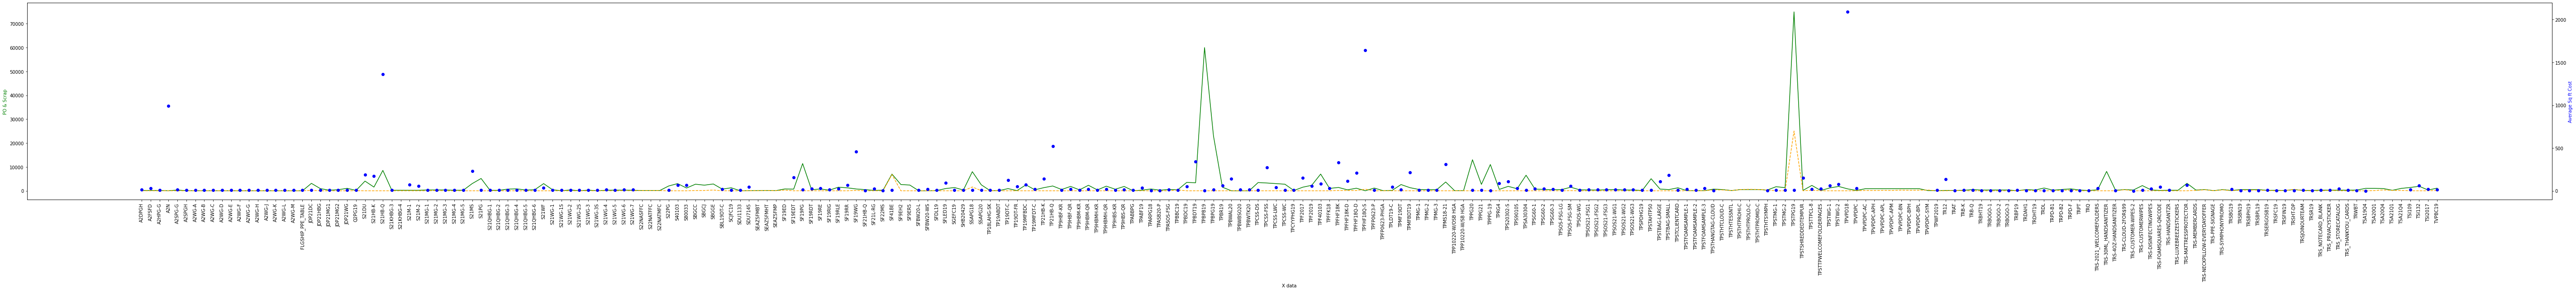

In [9]:

fig, ax1 = plt.subplots(figsize=(100, 8))
ax2 = ax1.twinx()
ax1.plot(grp1['productcode'], grp1['quantitypo'], 'g-')
ax1.plot(grp1['productcode'], grp1['QTYTotal'], '--', color='orange')
ax2.plot(grp1['productcode'], grp1['squareftcost'], 'o', color='blue')
ax1.set_xlabel('X data')
ax1.set_ylabel('PO & Scrap', color='g')
ax2.set_ylabel('Average Sq ft Cost', color='b')
ax1.tick_params(axis='x', rotation=90)
plt.show()

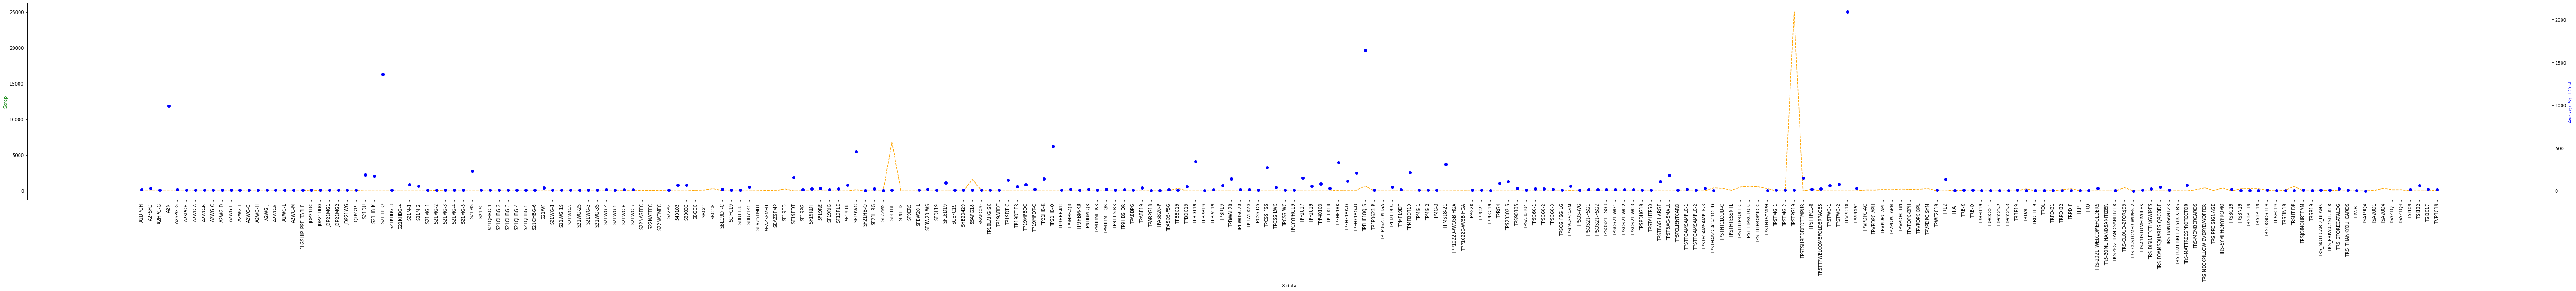

In [10]:
fig, ax1 = plt.subplots(figsize=(100, 8))
ax2 = ax1.twinx()
ax1.plot(grp1['productcode'], grp1['QTYTotal'], '--', color='orange')
ax2.plot(grp1['productcode'], grp1['squareftcost'], 'o', color='blue')
ax1.set_xlabel('X data')
ax1.set_ylabel('Scrap', color='g')
ax2.set_ylabel('Average Sq ft Cost', color='b')
ax1.tick_params(axis='x', rotation=90)
plt.show()

## Analysis on Purchase Order

C:\Users\ArjunDas.H\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ArjunDas.H\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\ArjunDas.H\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.

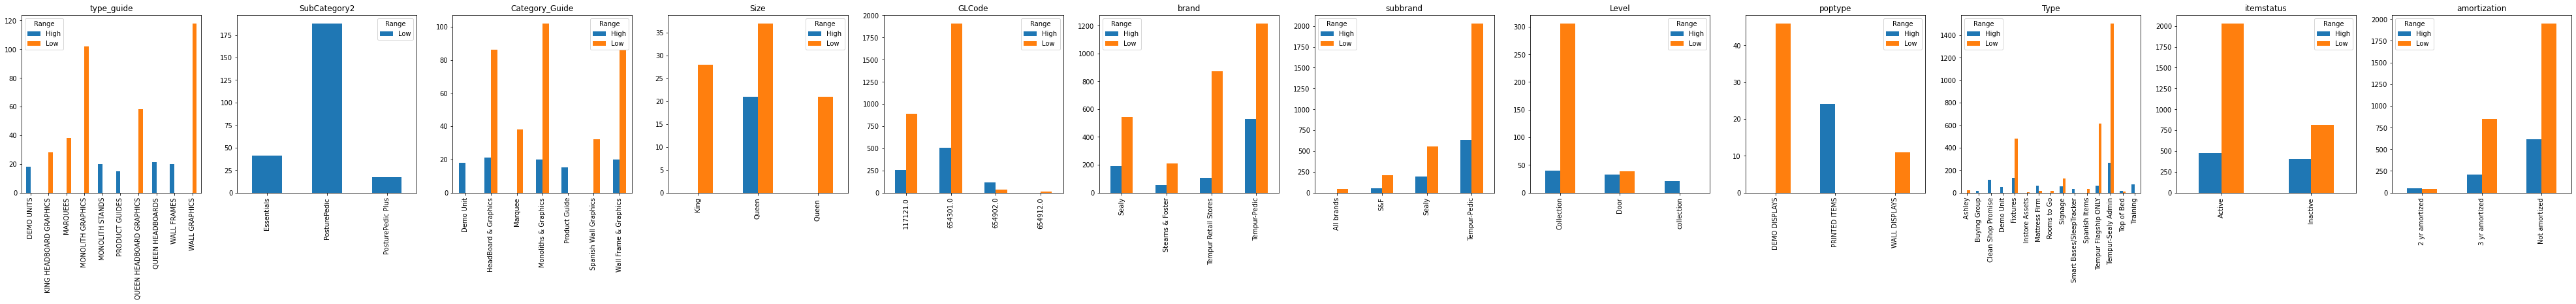

In [11]:
skupo1 = grp1[grp1['quantitypo']>2000]['productcode'].tolist()
hpo = dfmrg[dfmrg['productcode'].isin(skupo1)]
hpo['Range'] = 'High'

skupo2 = grp1[grp1['quantitypo']<500]['productcode'].tolist()
lpo = dfmrg[dfmrg['productcode'].isin(skupo2)]
lpo['Range'] = 'Low'

df1 = pd.concat([hpo, lpo])


dimentions = ['type_guide', 'SubCategory2', 'Category_Guide', 'Size', 'GLCode', 'brand', 'subbrand', 'Level', 'poptype', 'Type', 'itemstatus', 'amortization']

fig, ax = plt.subplots(1, len(dimentions), figsize=(70, 5))
for i, categorical_feature in enumerate(df1[dimentions]):
#     x = hpo[categorical_feature].value_counts()
    x = pd.crosstab(df1[categorical_feature],df1['Range'])
    if len(x)>0:
        x.plot(kind="bar", ax=ax[i], xlabel="").set_title(categorical_feature)
        
fig.show()

In [12]:
# skupo2 = grp1[grp1['quantitypo']<500]['productcode'].tolist()

# lpo = dfmrg[dfmrg['productcode'].isin(skupo2)]

# fig, ax = plt.subplots(1, len(dimentions), figsize=(70, 5))
# for i, categorical_feature in enumerate(lpo[dimentions]):
#     x = lpo[categorical_feature].value_counts()
#     if len(x)>0:
#         x.plot(kind="bar", ax=ax[i]).set_title(categorical_feature)
# fig.show()

## Analysis On Scrap Qty

In [13]:
skuscrp1 = grp1[grp1['QTYTotal']>200]['productcode'].tolist()
hsrp = dfmrg[dfmrg['productcode'].isin(skuscrp1)]
hsrp['Range'] = 'High'

skuscrp2 = grp1[grp1['QTYTotal']<100]['productcode'].tolist()
lsrp = dfmrg[dfmrg['productcode'].isin(skupo2)]
lsrp['Range'] = 'Low'

df2 = pd.concat([hsrp, lsrp])

C:\Users\ArjunDas.H\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ArjunDas.H\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


C:\Users\ArjunDas.H\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


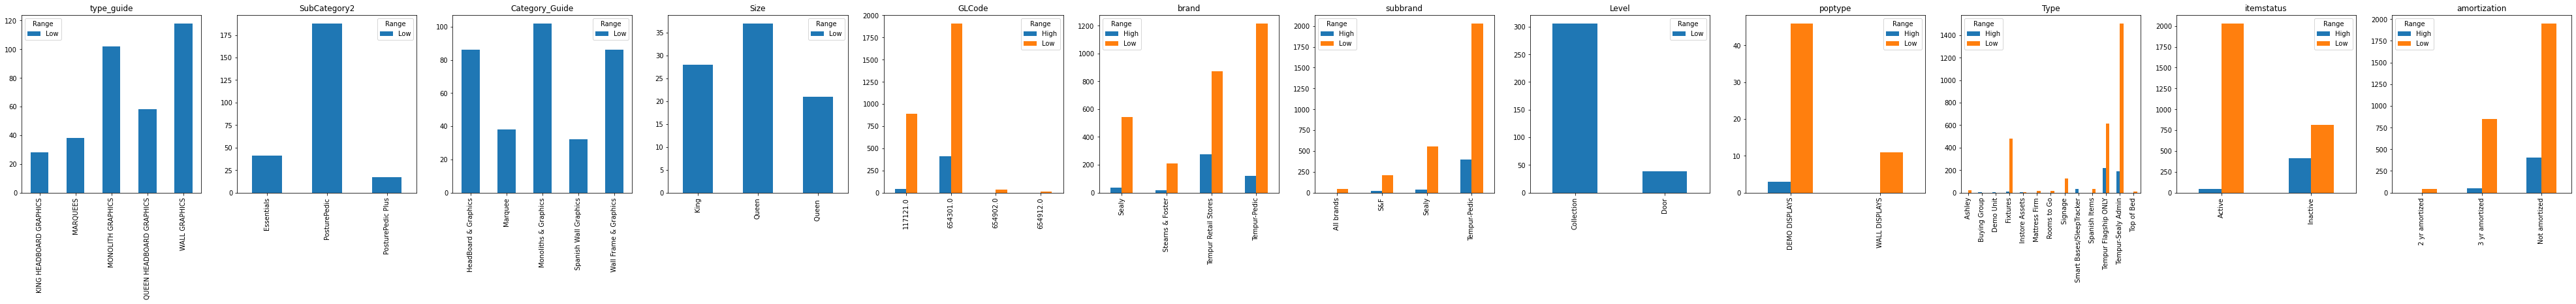

In [14]:
fig, ax = plt.subplots(1, len(dimentions), figsize=(70, 5))
for i, categorical_feature in enumerate(df2[dimentions]):
    x = pd.crosstab(df2[categorical_feature],df2['Range'])
    if len(x)>0:
        x.plot(kind="bar", ax=ax[i],  xlabel="").set_title(categorical_feature)
fig.show()

In [15]:
# fig, ax = plt.subplots(1, len(dimentions), figsize=(70, 5))
# for i, categorical_feature in enumerate(lsrp[dimentions]):
#     x = lsrp[categorical_feature].value_counts()
#     if len(x)>0:
#         x.plot(kind="bar", ax=ax[i]).set_title(categorical_feature)
# fig.show()

## Analysis On Storage Cost

In [16]:
skucost1 = grp1[grp1['squareftcost']>100]['productcode'].tolist()
hcost = dfmrg[dfmrg['productcode'].isin(skuscrp1)]
hcost['Range'] = 'High'

skucost2 = grp1[grp1['squareftcost']<27]['productcode'].tolist()
lcost = dfmrg[dfmrg['productcode'].isin(skupo2)]
lcost['Range'] = 'Low'


df3 = pd.concat([hcost, lcost])

C:\Users\ArjunDas.H\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ArjunDas.H\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


C:\Users\ArjunDas.H\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


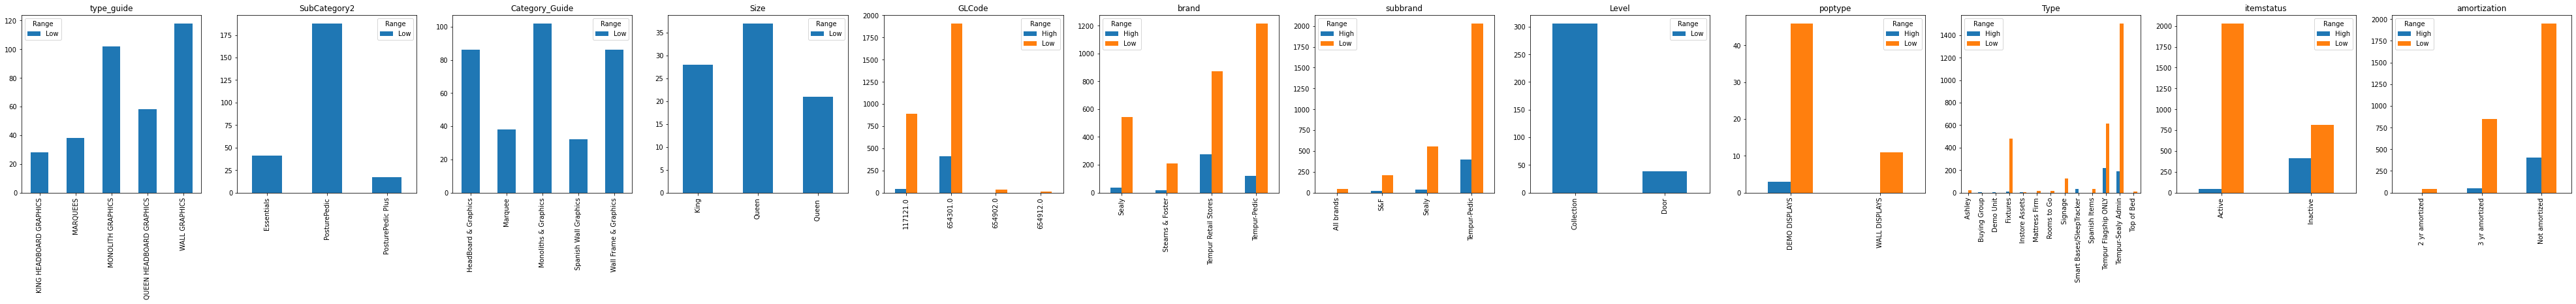

In [17]:
fig, ax = plt.subplots(1, len(dimentions), figsize=(70, 5))
for i, categorical_feature in enumerate(df3[dimentions]):
    x = pd.crosstab(df3[categorical_feature],df3['Range'])
    if len(x)>0:
        x.plot(kind="bar", ax=ax[i], xlabel="").set_title(categorical_feature)
fig.show()

In [18]:
# fig, ax = plt.subplots(1, len(dimentions), figsize=(70, 5))
# for i, categorical_feature in enumerate(lcost[dimentions]):
#     x = lcost[categorical_feature].value_counts()
#     if len(x)>0:
#         x.plot(kind="bar", ax=ax[i]).set_title(categorical_feature)
# fig.show()

In [19]:
grp1.to_excel(r"C:\Users\ArjunDas.H\Documents\TSI\Analysis Sep_02\grouped.xlsx", index=False)

In [20]:
grp1.head()

,productcode,QTYTotal,squareftcost,quantitypo,PO_freq
0,A2DPGH,0.0,10.951667,118.0,3
1,A2FSFD,0.0,30.807710,123.0,2
2,A2HPG-G,0.0,8.386829,100.0,1
3,A2N,0.0,992.607442,18.0,1
4,A2SPG-G,0.0,15.574286,300.0,1
